## Import Libraries and Functions

In [1]:
import numpy as np
import time
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Activation, Dense, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import log_loss
from keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from load_data import load_resized_data

Using TensorFlow backend.


## Constants

In [2]:
img_rows=100 #dimensions of image
img_cols=100
channel = 3 #RGB
num_classes = 2 
batch_size = 128
num_epoch = 4

## Convolutional Model

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxP

## Compile Model

In [4]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Load Data

### Malaria Cell Image Dataset Reference: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

In [5]:
X_train, X_valid, Y_train, Y_valid = load_resized_data(img_rows, img_cols)

['Parasitized', 'Uninfected']
------------------------------
Creating training images...
------------------------------
Loading done.


In [6]:
print(X_train.shape, Y_train.shape)

(22046, 100, 100, 3) (22046, 2)


## Train

In [7]:
t=time.time()

hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, 
                     shuffle=True, validation_data= (X_valid,Y_valid))

print('Training time: %s' % (time.time()-t))

Instructions for updating:
Use tf.cast instead.
Train on 22046 samples, validate on 5512 samples
Epoch 1/4
22046/22046 [==============================] - 147s 7ms/step - loss: 0.6468 - acc: 0.6144 - val_loss: 0.4858 - val_acc: 0.8104
Epoch 2/4
22046/22046 [==============================] - 147s 7ms/step - loss: 0.2906 - acc: 0.8946 - val_loss: 0.1843 - val_acc: 0.9285
Epoch 3/4
22046/22046 [==============================] - 147s 7ms/step - loss: 0.1882 - acc: 0.9293 - val_loss: 0.2995 - val_acc: 0.8316
Epoch 4/4
22046/22046 [==============================] - 146s 7ms/step - loss: 0.1758 - acc: 0.9428 - val_loss: 0.1614 - val_acc: 0.9512
Training time: 588.0902261734009


## If training did not work as expected I suggest loading in the working weights from below. You should hit 94%-95% validation accuracy

## Loading weights

In [10]:
#uncomment if training yields poor accuracy
#from keras.models import load_model
#model = load_model('malaria_model.h5')

## Predictions

In [8]:
y_pred = model.predict(X_valid, batch_size=batch_size, verbose=1)

5512/5512 [==============================] - 11s 2ms/step


In [9]:
y_pred = np.argmax(y_pred, axis=1)

In [10]:
y_actual = np.argmax(Y_valid, axis=1)

In [11]:
correct = y_actual[y_actual == y_pred]
incorrect = y_actual[y_actual != y_pred]

print("Test Accuracy = ", len(correct)/len(y_actual), "%")
print("Test Inaccuracy = ", len(incorrect)/len(y_actual),"%")

Test Accuracy =  0.9511973875181422 %
Test Inaccuracy =  0.048802612481857764 %


In [12]:
y_pred = model.predict(X_train, batch_size=batch_size, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
y_actual = np.argmax(Y_train, axis=1)

correct = y_actual[y_actual == y_pred]
incorrect = y_actual[y_actual != y_pred]

22046/22046 [==============================] - 42s 2ms/step


In [13]:
print("Test Accuracy = ", len(correct)/len(y_actual), "%")
print("Test Inaccuracy = ", len(incorrect)/len(y_actual),"%")

Test Accuracy =  0.9542320602376848 %
Test Inaccuracy =  0.045767939762315156 %


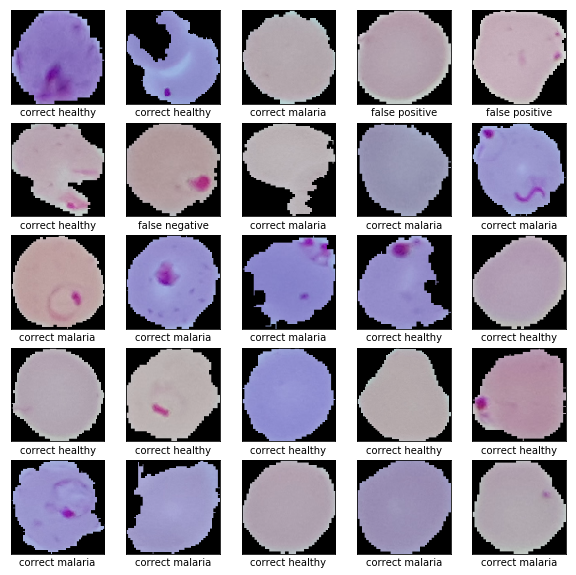

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_valid[i])
    if y_pred[i] == 0:
        if y_pred[i] == y_actual[i]:
            plt.xlabel("correct malaria")
        if y_pred[i] != y_actual[i]:
            plt.xlabel("false positive")
    else:
        if y_pred[i] == y_actual[i]:
            plt.xlabel("correct healthy")
        if y_pred[i] != y_actual[i]:
            plt.xlabel("false negative")